In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Там, где клиент только пришел (tenure = 0), его суммарные выплаты по факту пропущены. Заполним их нулями

data['TotalCharges'] = data['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

Что по пропускам?

In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<br><br>Посмотрим на общее распределение клиентов по двум группам - отточные (кого хотим отлавливать) и неотточные.

In [7]:
print('Баланс классов - отточные и неотточные клиенты. В абсолютных величинах и процентах')
display(data['Churn'].value_counts())
display(100 * data['Churn'].value_counts(normalize=True))

Баланс классов - отточные и неотточные клиенты. В абсолютных величинах и процентах


No     5174
Yes    1869
Name: Churn, dtype: int64

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

No handles with labels found to put in legend.


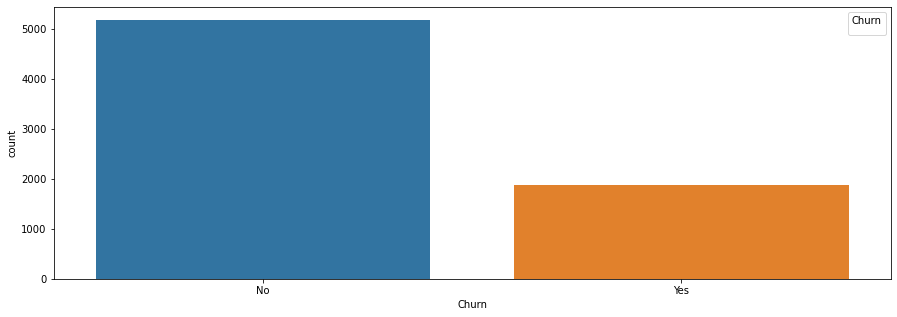

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn')
ax.set(xlabel='Churn')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn')
plt.show()

#### Можем посмотреть на то, какие факторы есть у каждого клиента и какое распределение они имеют в нашей выборке

Пожилые клиенты:

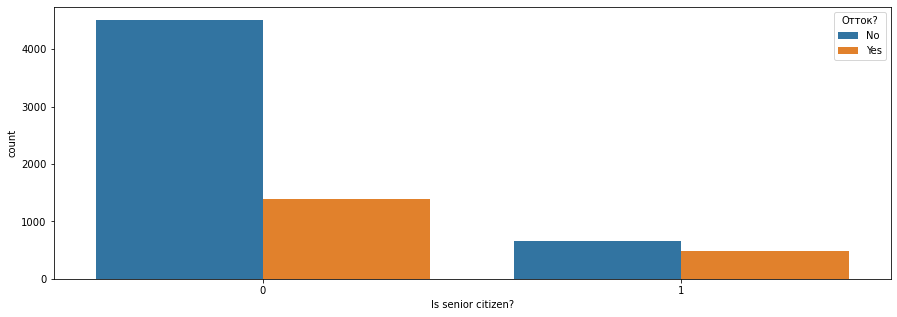

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='SeniorCitizen', hue='Churn')
ax.set(xlabel='Is senior citizen?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Отток?')
plt.show()

То есть среди пожилых отток идет чаще, примерно в 40% случаев.

# НОВОЕ

In [10]:
print(f'P(Уйдет в отток | пожилой) = {data[data["SeniorCitizen"] == 1]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | пажилой) = 0.4168126094570928


И наоборот: среди отточных клиентов выше доля пожилых людей. Тут, я думаю, без комментариев все понятно. 

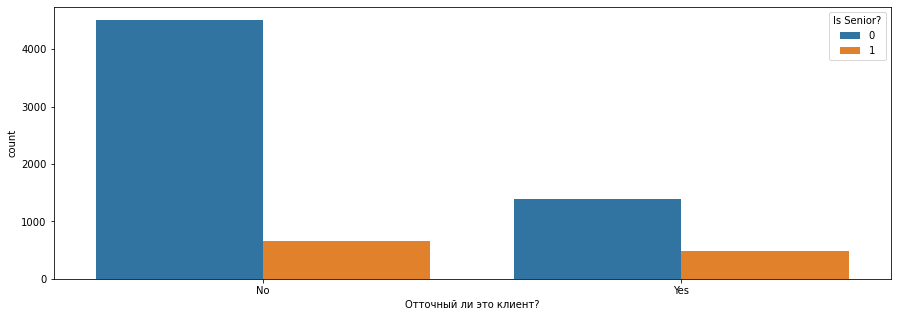

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='SeniorCitizen')
ax.set(xlabel='Отточный ли это клиент?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Is Senior?')
plt.show()

Гендер:

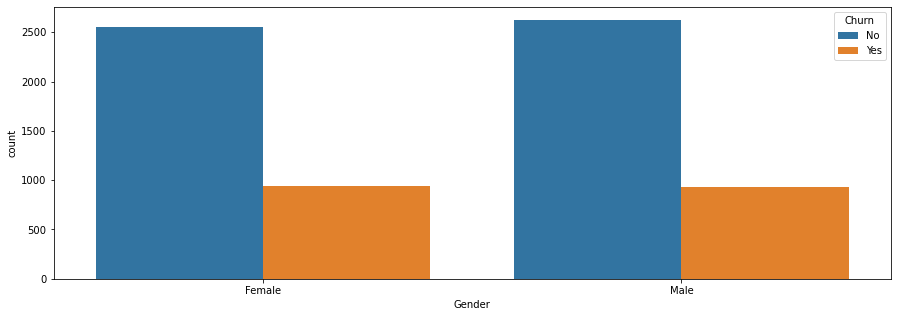

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='gender', hue='Churn')
ax.set(xlabel='Gender')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn')
plt.show()

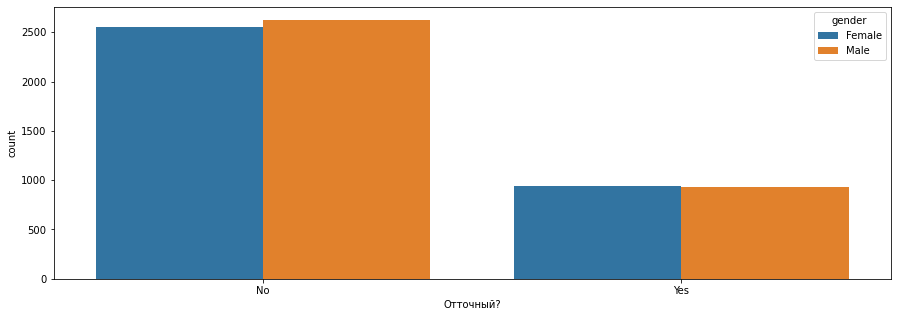

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='gender')
ax.set(xlabel='Отточный?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='gender')
plt.show()

Ура. Хоть где-то равенство!!!

Есть ли у клиента партнер?

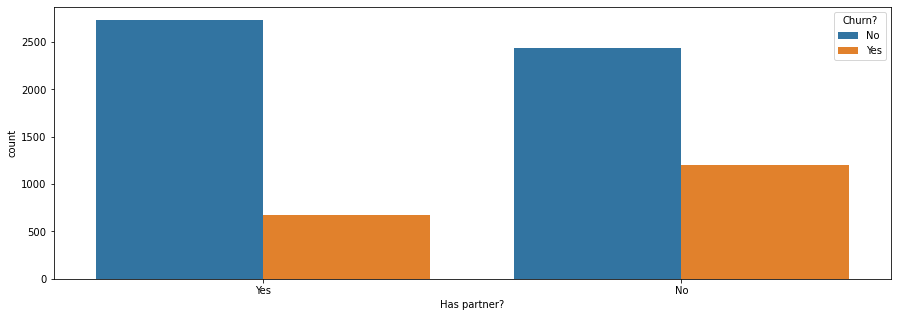

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Partner', hue='Churn')
ax.set(xlabel='Has partner?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Любопытно. Люди без партнеров чаще уходят в отток. 

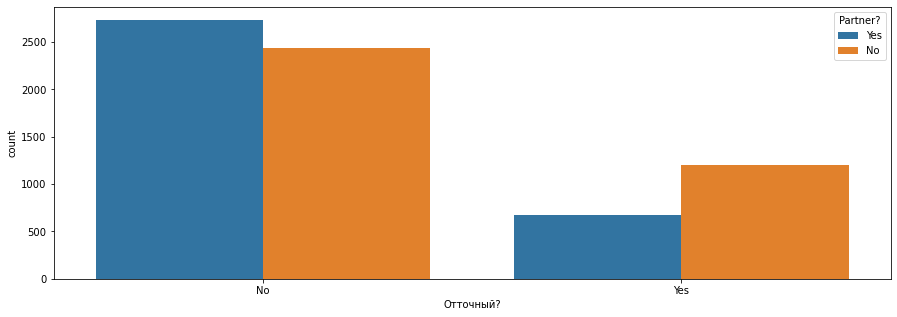

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='Partner')
ax.set(xlabel='Отточный?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Partner?')
plt.show()

Да. Если клиент отточный, то высок шанс, что он одинок (в 2 из 3 случаев).

Есть ли у клиента иждивенцы?

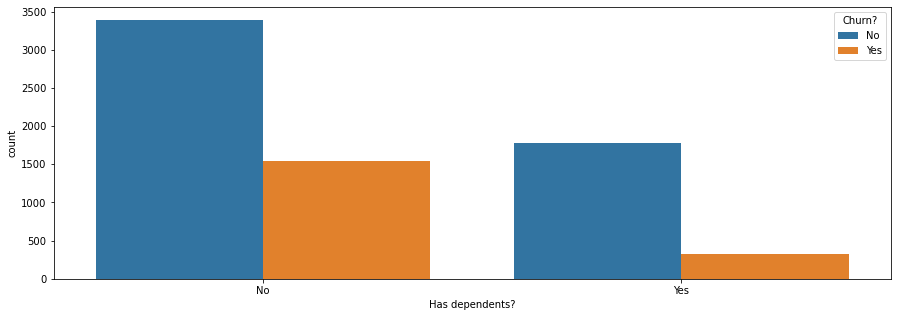

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Dependents', hue='Churn')
ax.set(xlabel='Has dependents?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Крайне интересно! Люди, у которых есть иждивенцы, реже уходят в отток. Почему так? 

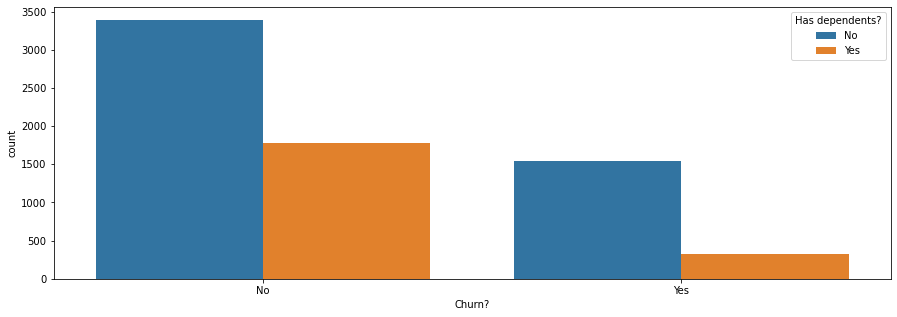

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='Dependents')
ax.set(xlabel='Churn?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Has dependents?')
plt.show()

Очень странная картина. Признаться, я ожидал, что если у человека есть иждивенцы, то он с большей вероятностью уйдет в отток. Тут же наблюдается обратная история.

# НОВОЕ, СЛУЧАЙНО ПРОПУСТИЛ ПЕРЕМЕННУЮ PhoneService

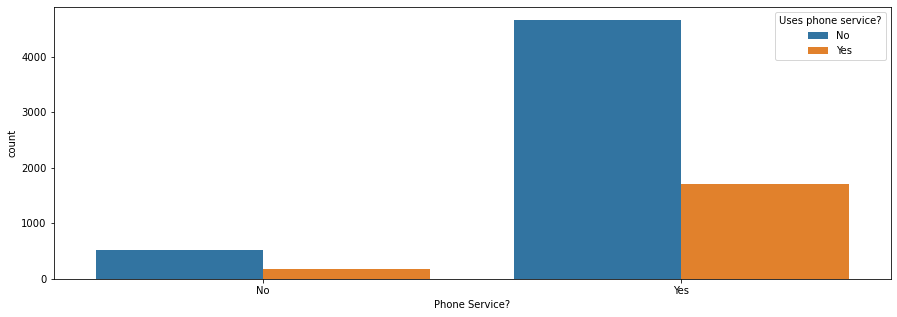

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='PhoneService', hue='Churn')
ax.set(xlabel='Phone Service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Uses phone service?')
plt.show()

In [19]:
print(f'P(Уйдет в отток | Подключена мобильная связь) = {data[data["PhoneService"] == "Yes"]["Churn"].value_counts(normalize=True)["Yes"]}')
print(f'P(Уйдет в отток | Не подключена мобильная связь) = {data[data["PhoneService"] == "No"]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Подключена мобильная связь) = 0.2670963684955196
P(Уйдет в отток | Не подключена мобильная связь) = 0.24926686217008798


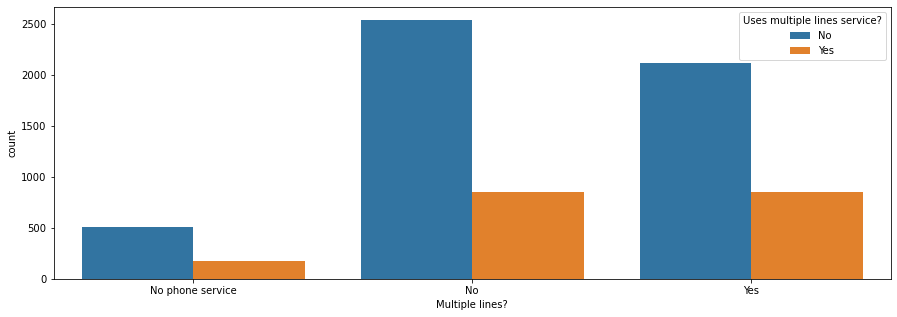

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='MultipleLines', hue='Churn')
ax.set(xlabel='Multiple lines?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Uses multiple lines service?')
plt.show()

In [21]:
print(f'P(Уйдет в отток | Несколько линий) = {data[data["MultipleLines"] == "Yes"]["Churn"].value_counts(normalize=True)["Yes"]}')
print(f'P(Уйдет в отток | Одна линия) = {data[data["MultipleLines"] == "No"]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Несколько линий) = 0.286098956580276
P(Уйдет в отток | Одна линия) = 0.2504424778761062


##### То есть в целом можно сказать, что мобильная связь слабо влияет на вероятность оттока клиента

Зависимость оттока от используемого типа интернета:

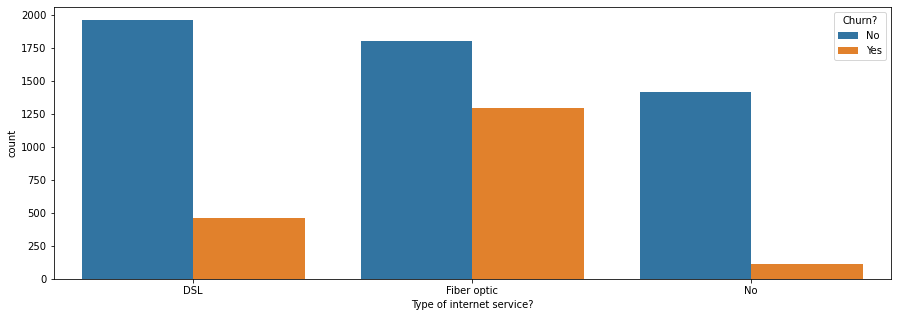

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='InternetService', hue='Churn')
ax.set(xlabel='Type of internet service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Если клиент использует оптоволокно, то вероятность его ухода сильно повышается!

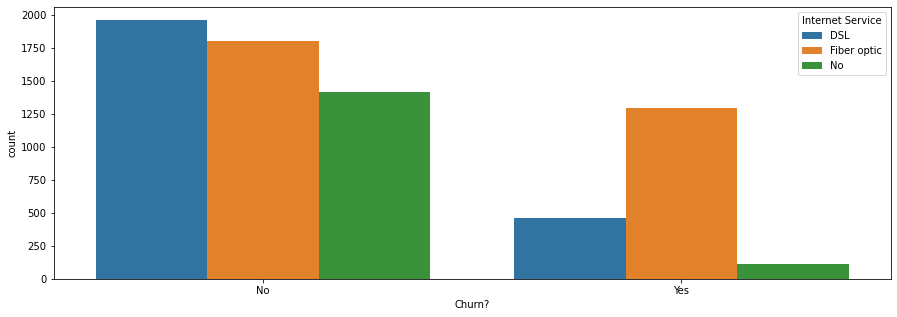

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='InternetService')
ax.set(xlabel='Churn?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Internet Service')
plt.show()

Если клиент отточный, то почти наверняка он будет использовать оптоволокно. Похоже, что оптоволокно часто доставляет клиентам какие-то большие неудобства. 

# НОВОЕ

Пока заметно, что те, кто не пользуется интернетом, реже уходят от компании. Создадим признак "usesWeb"

In [24]:
data['usesWeb'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

In [25]:
data['usesWeb'].value_counts()

1    5517
0    1526
Name: usesWeb, dtype: int64

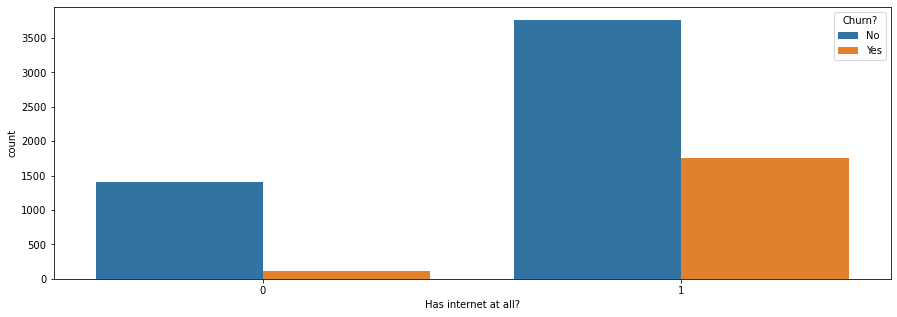

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='usesWeb', hue='Churn')
ax.set(xlabel='Has internet at all?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

То есть, вероятности ухода в отток:

In [27]:
print(f'P(Уйдет в отток | Не пользуется интернетом) = {data[data["usesWeb"] == 0]["Churn"].value_counts(normalize=True)["Yes"]}')
print(f'P(Уйдет в отток | Пользуется интернетом) = {data[data["usesWeb"] == 1]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Не пользуется интернетом) = 0.07404980340760157
P(Уйдет в отток | Пользуется интернетом) = 0.3182889251404749


In [28]:
print(f'P(Уйдет в отток | Пользуется оптоволокном) = {data[data["InternetService"] == "Fiber optic"]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Пользуется оптоволокном) = 0.4189276485788114


А оптоволокном у нас пользуется порядка 43% пользователей

In [29]:
data[data["InternetService"] == "Fiber optic"].shape[0] / data.shape[0]

0.4395854039471816

##### Гипотеза такая, что те, кто пользуется интернетом, а особенно - оптоволокном, более требовательны к качеству предоставляемых услуг. Возможно, такие клиенты еще и более молодые. Можно проверить связь между возрастом и интернетом. 

In [30]:
data[data["InternetService"] == "Fiber optic"]['SeniorCitizen'].value_counts(normalize=True)

0    0.731589
1    0.268411
Name: SeniorCitizen, dtype: float64

In [31]:
data[data["usesWeb"] == 1]["SeniorCitizen"].value_counts(normalize=True)


0    0.802429
1    0.197571
Name: SeniorCitizen, dtype: float64

In [32]:
print('Пожилые люди:')
print(data[data['SeniorCitizen'] == 1]['InternetService'].value_counts(normalize=True))
print('\n\nНе пожилые люди:')
print(data[data['SeniorCitizen'] == 0]['InternetService'].value_counts(normalize=True))

Пожилые люди:
Fiber optic    0.727671
DSL            0.226795
No             0.045534
Name: InternetService, dtype: float64


Не пожилые люди:
Fiber optic    0.383833
DSL            0.366379
No             0.249788
Name: InternetService, dtype: float64


Очень странная картина! Я ожидал увидеть, что пожилые люди будут реже пользоваться интернетом, а тут выходит так, что для пожилого человека вероятность пользования интернетом > 95%

###### То есть наша гипотеза о связи интернета и возраста не подтвердилась

Зависимость от подключения к услуге по обеспечению онлайн-безопасности

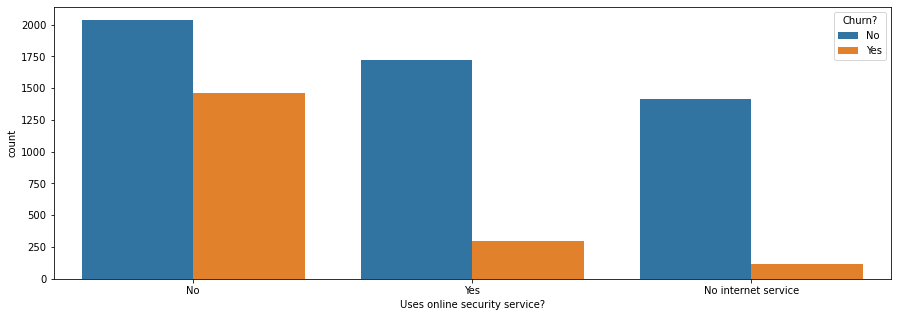

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='OnlineSecurity', hue='Churn')
ax.set(xlabel='Uses online security service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Если у клиента подключена услуга интернета и не подключена онлайн-безопасность, то шансы его оттока очень велики! Они хуже, чем 2 к 1. 

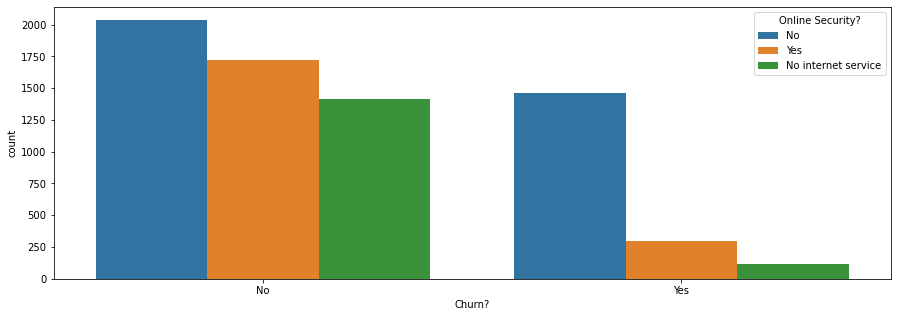

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Churn', hue='OnlineSecurity')
ax.set(xlabel='Churn?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Online Security?')
plt.show()

Похожая история. Коль скоро клиент отточный, то почти наверняка у него есть интернет, но не подключена услуга по онлайн безопасности.

Есть ли зависимость от услуги хранения резервных копий в онлайне?

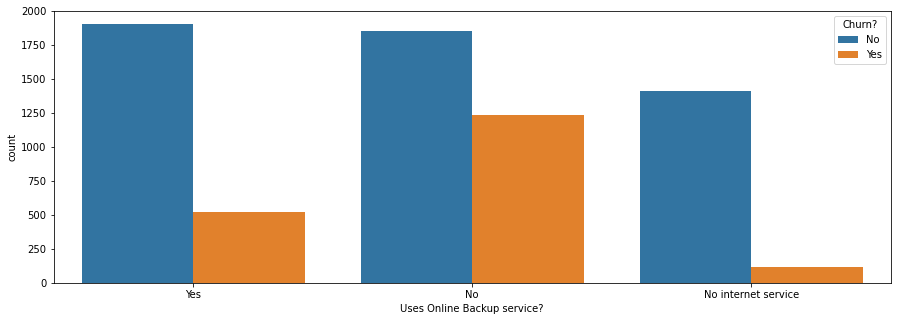

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='OnlineBackup', hue='Churn')
ax.set(xlabel='Uses Online Backup service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Практически аналогичная история с онлайн-безопасностью.

Есть ли зависимость от услуги защиты устройства

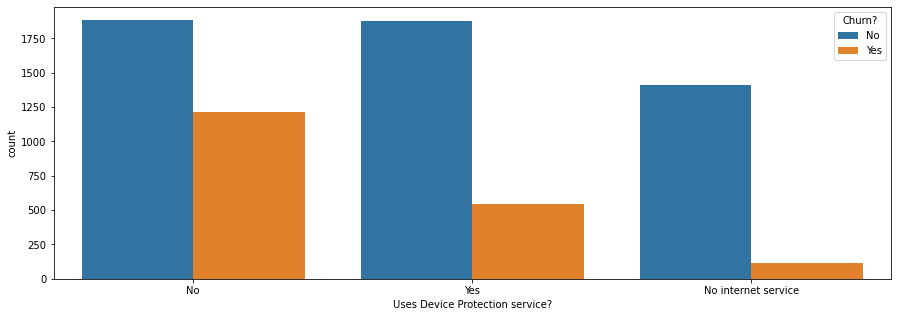

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='DeviceProtection', hue='Churn')
ax.set(xlabel='Uses Device Protection service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Аналогичная история с рассмотренными ранее услугами у абонента.

Есть ли зависимость от услуги "техподдержка"?

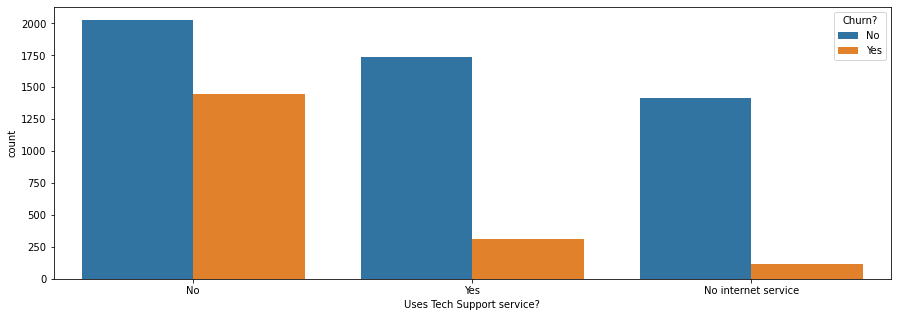

In [37]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='TechSupport', hue='Churn')
ax.set(xlabel='Uses Tech Support service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Опять та же история.

Есть ли зависимость от услуги "StreamingTV"?

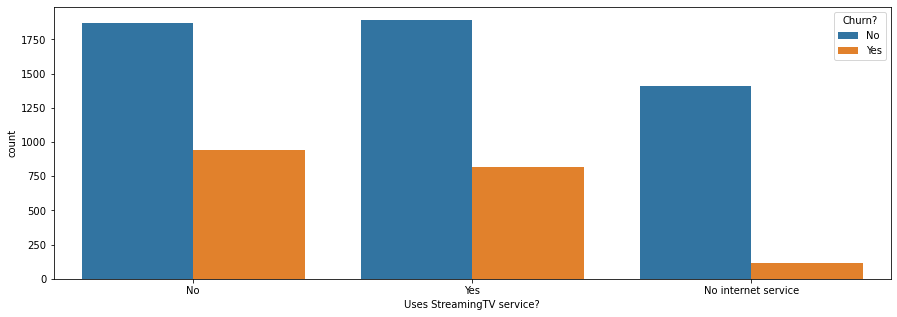

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='StreamingTV', hue='Churn')
ax.set(xlabel='Uses StreamingTV service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Здесь уже более спокойная история. Подключенная услуга интернет-телевидения не понижает шансы ухода клиента в отток. <br> Похоже, что клиенты не слишком довольны интернет-ТВ.

Есть ли зависимость от услуги "StreamingMovies"?

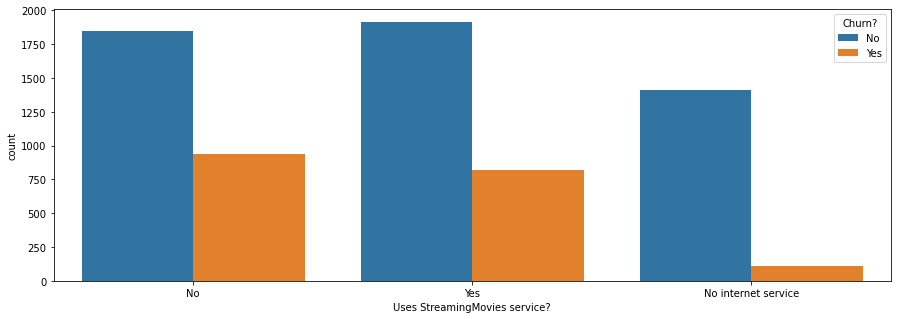

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='StreamingMovies', hue='Churn')
ax.set(xlabel='Uses StreamingMovies service?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Аналогично предыдущему случаю. 

###### Увидев примерное влияние различных услуг на шансы ухода клиента в отток, рассмотрим финансовые и юридические признаки.

Посмотрим на влияние типа контракта с клиентов на шансы ухода в отток.

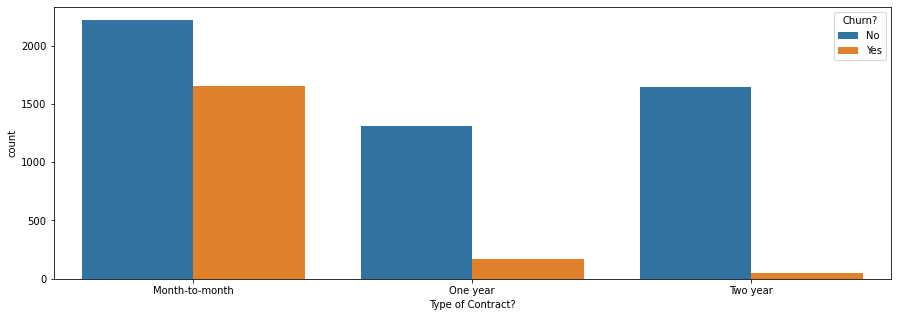

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='Contract', hue='Churn')
ax.set(xlabel='Type of Contract?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

In [41]:
data[data['Contract'] == 'Month-to-month']['Churn'].value_counts(True)

No     0.572903
Yes    0.427097
Name: Churn, dtype: float64

Абсолютно ожидаемая история. Клиенты с более долгосрочными контрактами реже уходят в отток. 

Посмотрим на влияние типа контракта с клиентов на шансы ухода в отток.

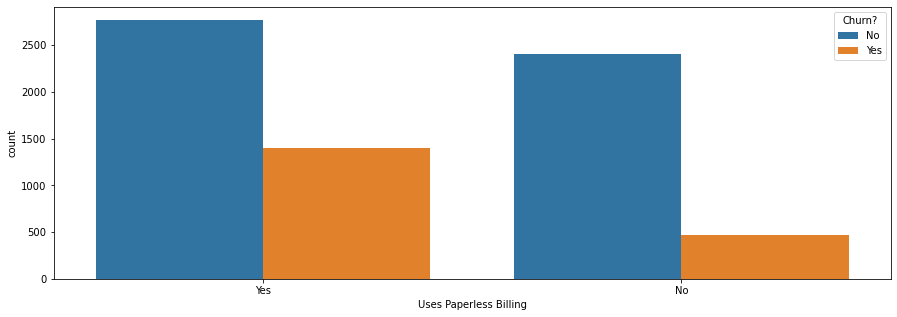

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='PaperlessBilling', hue='Churn')
ax.set(xlabel='Uses Paperless Billing')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Возможно, те, кто использует безналичную оплату, являются более "продвинутыми" пользователями и легче находят более выгодные предложения от других компаний. Поэтому они чаще уходят в отток. 

Зависимость от переменной "PaymentMethod"

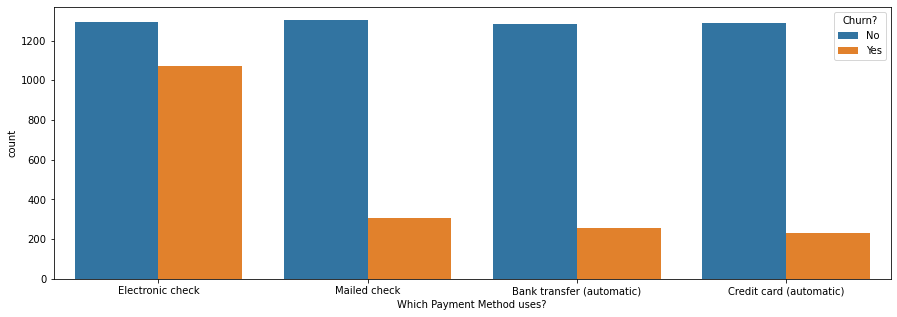

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
ax.set(xlabel='Which Payment Method uses?')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn?')
plt.show()

Наблюдаем аномально высокую вероятность ухода в отток в случае, если клиент использует электронный чек как метод оплаты. <br>Электронный чек - это по сути оплата через интернет. В каком-то смысле, самый "продвинутый" способ оплаты. 

##### Категориальные признаки закончились. Давайте взглянем на числовые. 

<br><br><br>Посмотрим на то, как распределено число месяцев, которое клиент уже провел, пользуясь услугами компании

No handles with labels found to put in legend.


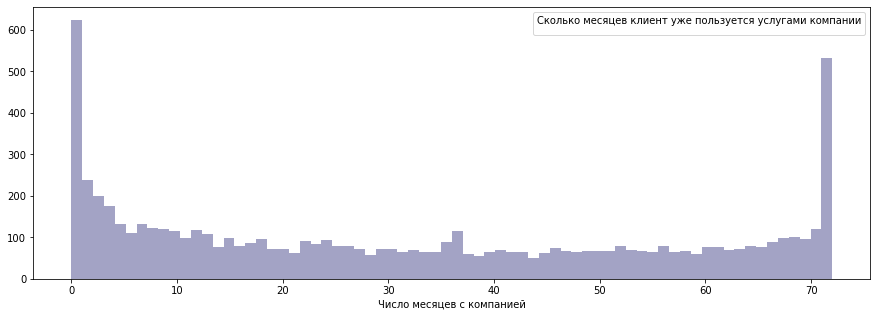

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(data['tenure'], kde=False, bins=70, color='midnightblue')
ax.set(xlabel='Число месяцев с компанией')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Сколько месяцев клиент уже пользуется услугами компании')
plt.show()

На гистограмме выше видно, что распределение в выборке близко к равномерному, если обрезать хвосты - очень много людей только пришло в компанию (5 и меньше месяцев) и очень много тех, кто с компанией долго (70+ месяцев). <br><br><br>Любопытно, что происходит такой аномальный рост на отметке в 70-71 месяцев, так как на левом хвосте падение идет гораздо более плавно. Максимум значений переменной = 72. И на 72 приходится 362 (!) наблюдения. Есть ощущение, что числом 72 обозначали всех, кто с компанией больше 71 месяца. Или же нам просто досталась такая необычная выборка. 
<br><br> Ниже можно увидеть описательные статистики переменной tenure. Среднее близко к медиане, что и ожидалось в "почти равномерной" выборке. 

In [45]:
data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

No handles with labels found to put in legend.


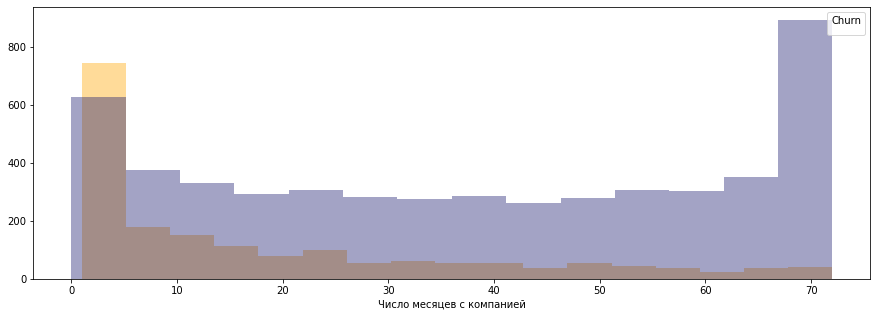

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
gone_churn = data.loc[data['Churn'] == 'Yes']
sticked = data.loc[data['Churn'] == 'No']

sns.distplot(gone_churn[['tenure']], hist=True, rug=False, kde=False, color='orange')
sns.distplot(sticked[['tenure']], hist=True, rug=False, kde=False, color='midnightblue')
ax.set(xlabel='Число месяцев с компанией')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn')

plt.show()

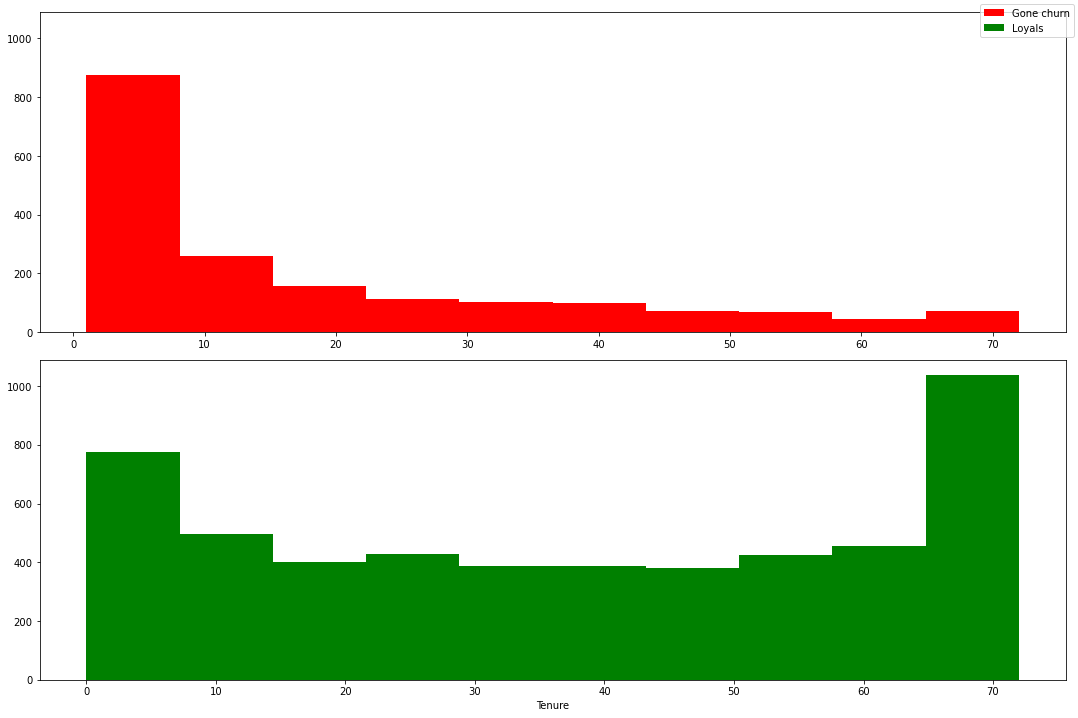

In [47]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True, figsize=(15, 10))

axs[0].hist(data[(data['Churn'] == 'Yes')]['tenure'], color='red', label='Gone churn')
axs[1].hist(data[(data['Churn'] == 'No')]['tenure'], color='green', label='Loyals')
for ax in axs:
    ax.grid(False)
plt.xlabel('Tenure')

fig.legend(loc='upper right', frameon=True)

Видим, что если клиенты уходят, то почти наверняка - в течение первых 10-12 месяцев. Хвост у распределения ушедших клиентов есть, но он не слишком значительный. 

In [48]:
data[(data['Churn'] == 'Yes')]['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [49]:
data[data['Churn'] == 'Yes']['tenure'].quantile(.8)

35.0

То есть 50% отточных клиентов уйдут в течение первых 10 месяцев пользования услугами компании. <br> А 75% в течение первых 29 месяцев.
<br> 80% за первые 35 месяцев

<br><br> Что по ежемесячным платежам?

No handles with labels found to put in legend.


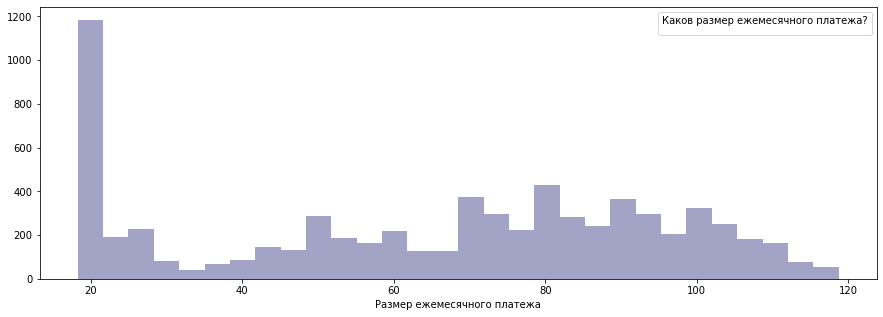

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(data['MonthlyCharges'], kde=False, bins=30, color='midnightblue')
ax.set(xlabel='Размер ежемесячного платежа')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Каков размер ежемесячного платежа?')
plt.show()

In [51]:
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Выходит, что большинство людей имеет самый простой тариф - они платят 18-22 у.е. в месяц. Но в выборке немало и тех, кто платит очень много (> 100 уе в месяц). Поэтому эти крайние значения с учетом довольно мощных хвостов отодвигают среднее и медиану в район 65-70 уе в месяц. <br><br>Можно сказать, что клиенты, как правило, либо платят по минимальному тарифу, либо имеют довольно большой пакет услуг (> 65-70 уе). А вот наблюдей > 25 и < 60 уже поменьше. <br> Опять же, видим, что 25% клиентов платят более 90 уе в месяц. 

No handles with labels found to put in legend.


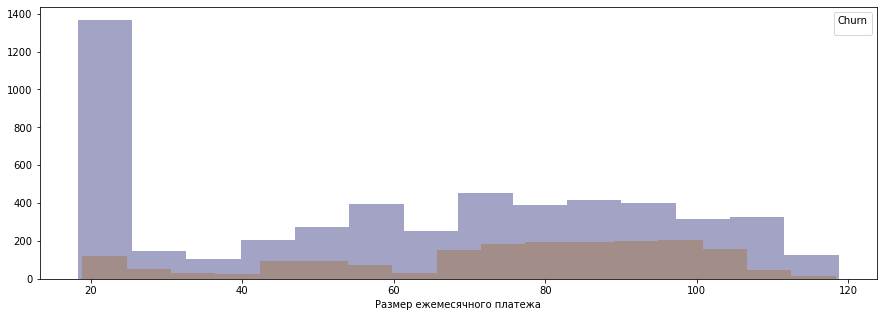

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
gone_churn = data.loc[data['Churn'] == 'Yes']
sticked = data.loc[data['Churn'] == 'No']

sns.distplot(gone_churn[['MonthlyCharges']], hist=True, rug=False, kde=False, color='orange')
sns.distplot(sticked[['MonthlyCharges']], hist=True, rug=False, kde=False, color='midnightblue')
ax.set(xlabel='Размер ежемесячного платежа')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Churn')

plt.show()

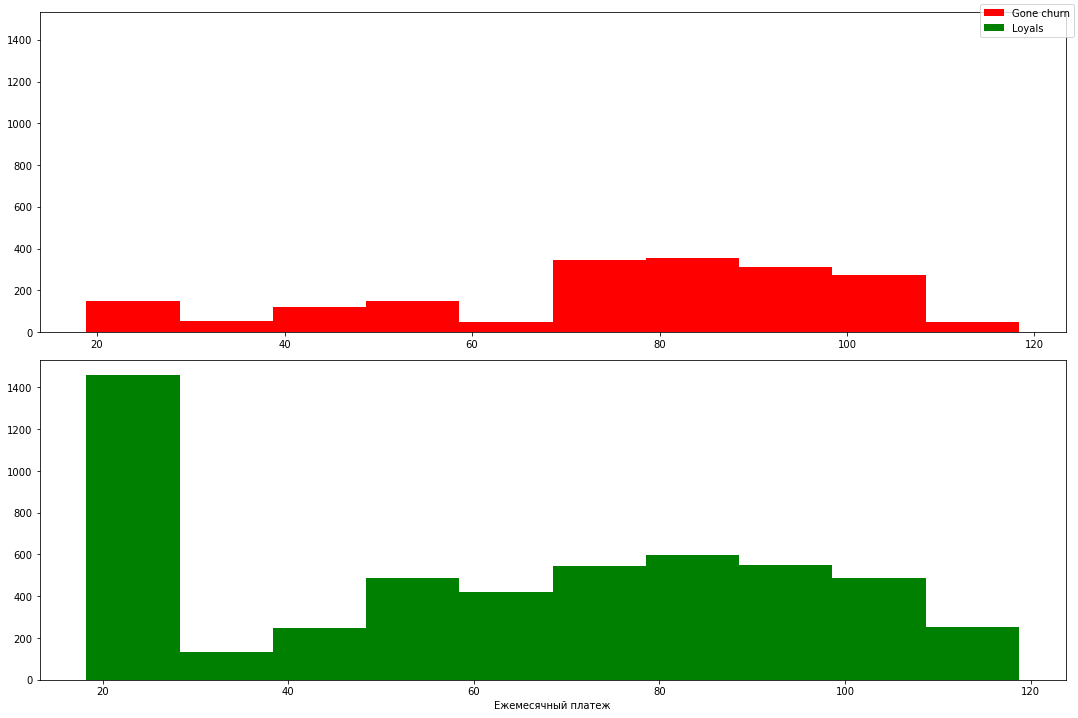

In [53]:
fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True, figsize=(15, 10))

axs[0].hist(data[(data['Churn'] == 'Yes')]['MonthlyCharges'], color='red', label='Gone churn')
axs[1].hist(data[(data['Churn'] == 'No')]['MonthlyCharges'], color='green', label='Loyals')
for ax in axs:
    ax.grid(False)
plt.xlabel('Ежемесячный платеж')

fig.legend(loc='upper right', frameon=True)

Интересно, что среди тех, кто уходит в отток, большинство - клиенты с высокой ежемесячной оплатой.
<br> Мы помним также, что если клиент не пользовался никакими доп. услугами компании, то шанс его ухода - минимальный. 

Как мне кажется, можно выдвинуть гипотезу о том, что те, кто пользуется исключительно мобильной связью, являются наименее требовательными клиентами. Также можно рассмотреть гипотезу о том, что доп. услуги компании имеют не самое высокое качество. 

А что же по распределению выручки с клиента за весь период?

No handles with labels found to put in legend.


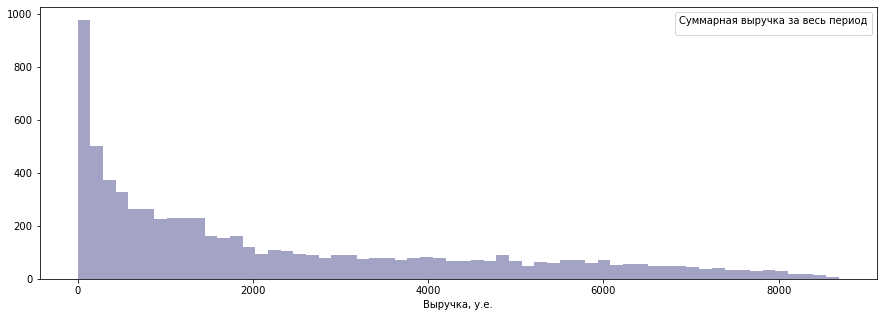

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(data['TotalCharges'], kde=False, bins=60, color='midnightblue')
ax.set(xlabel='Выручка, у.е.')
ax.grid(False)
ax.legend(loc='upper right', frameon=True, title='Суммарная выручка за весь период')
plt.show()

In [55]:
data['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

В целом, похоже на Хи-квадрат распределение с низким числом степеней свободы. Большинство принесло мало выручки (мода лежит около нуля), но есть очень тяжелый и длинный хвост, который содержит в себе много клиентов. Поэтому среднее значение уходит довольно далеко вправо.

#### Основные моменты:
- В нашей выборке явно присутствуют факторы, которые достаточно сильно влияют на вероятность ухода клиента в отток
- Возможно, в совокупности (совместное распределение) данные факторы еще лучше отделяют друг от друга лояльных клиентов и тех, которые отказываются от услуг компании <br>
- В перспективе следует лучше изучить гипотезы о том, что клиенты, пользующиеся исключительно мобильной связью, наименее требовательны к качеству предоставляемых услуг и о том, что повышенная отточность среди тех, кто пользуется доп. услугами компании спровоцирована их низким качеством. 

В то время как построение модели машинного обучения позволит лучше "отлавливать" клиентов, готовых отказаться от услуг компании, проверка и изучение описанных выше гипотез поможет лучше понять причину этого самого оттока и решить корень проблемы. 

# НОВОЕ

Было замечено, что такие переменные, как:
1. Подключенная услуга интернета и ее тип
2. Подключенная безналичная оплата
3. Способ оплаты
4. Возраст

Сильно влияют на распределение целевой переменной. <br>Проверим, как они ведут себя вместе.

Возьмем только интересующие нас признаки

In [56]:
df = data[['InternetService', 'SeniorCitizen', 'usesWeb', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Contract', 'Churn']]


In [57]:
df['Churn_encoded'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1)

<ipython-input-57-128fdd339801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn_encoded'] = df['Churn'].apply(lambda x: 0 if x == 'No' else 1)


In [58]:
df

,InternetService,SeniorCitizen,usesWeb,PaperlessBilling,PaymentMethod,MonthlyCharges,Contract,Churn,Churn_encoded
0,DSL,0,1,Yes,Electronic check,29.85,Month-to-month,No,0
1,DSL,0,1,No,Mailed check,56.95,One year,No,0
2,DSL,0,1,Yes,Mailed check,53.85,Month-to-month,Yes,1
3,DSL,0,1,No,Bank transfer (automatic),42.30,One year,No,0
4,Fiber optic,0,1,Yes,Electronic check,70.70,Month-to-month,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,DSL,0,1,Yes,Mailed check,84.80,One year,No,0
7039,Fiber optic,0,1,Yes,Credit card (automatic),103.20,One year,No,0
7040,DSL,0,1,Yes,Electronic check,29.60,Month-to-month,No,0
7041,Fiber optic,1,1,Yes,Mailed check,74.40,Month-to-month,Yes,1


##### Посмотрим на то, как разные комбинации данных признаков будут влиять на отток

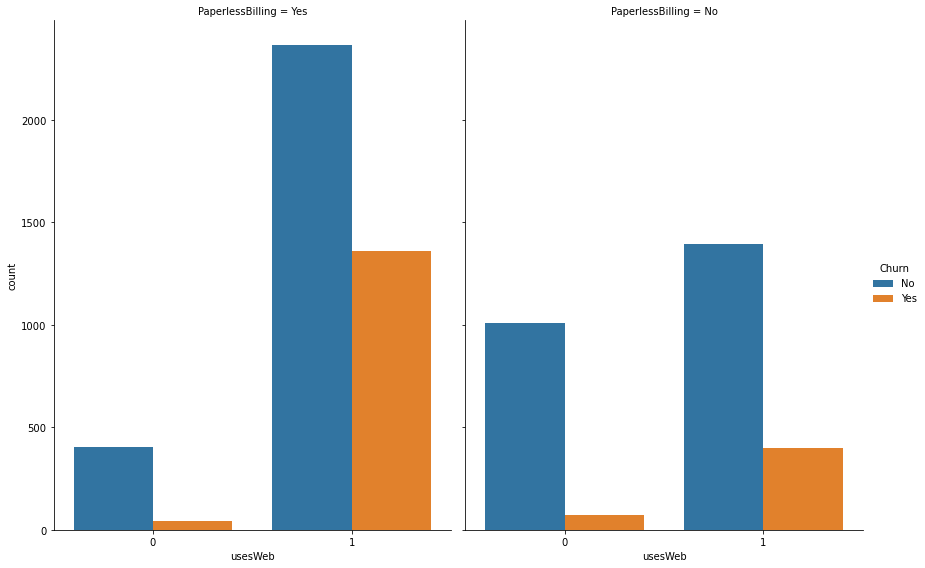

In [59]:
sns.catplot(x="usesWeb", hue="Churn", col="PaperlessBilling", data=df, kind="count", height=8, aspect=.75);


###### Безналичная оплата усиливает действие интернета на вероятность оттока

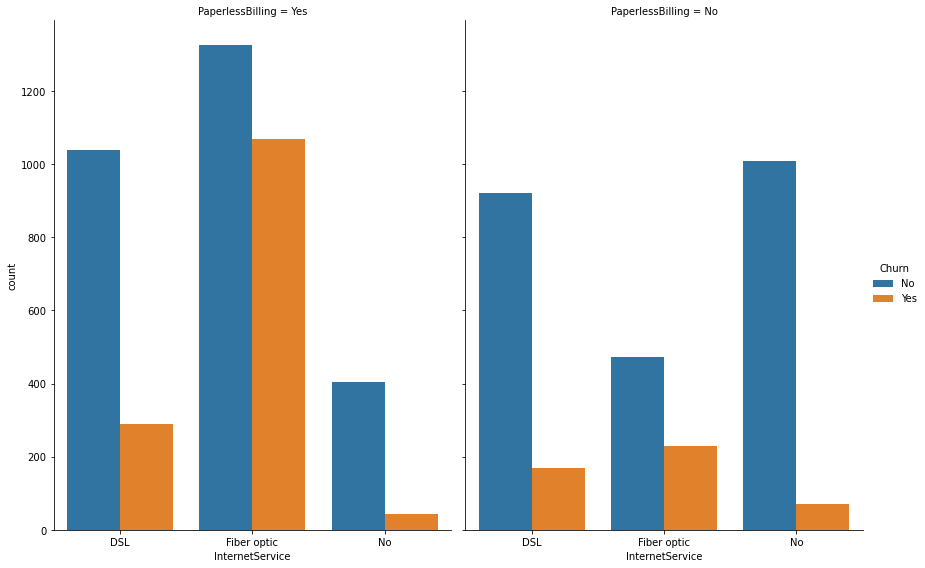

In [60]:
sns.catplot(x="InternetService", hue="Churn", col="PaperlessBilling", data=df, kind="count", height=8, aspect=.75);


###### Очень рискованная группа клиентов - та, которая пользуется оптоволокном и безналичной оплатой. В такой ситуации вероятность оттока почти 1 к 1

In [61]:
print(f'P(Уйдет в отток | Безнал и оптоволокно) = {data[(data["InternetService"] == "Fiber optic") & (data["PaperlessBilling"] == "Yes")]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Безнал и оптоволокно) = 0.44592901878914404


###### Тип контракта и безналичная оплата

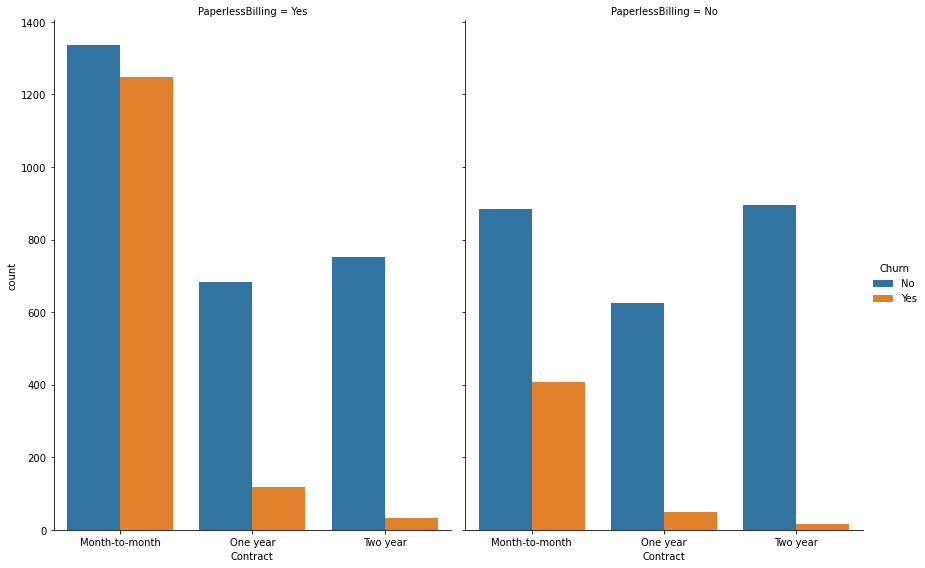

In [62]:
sns.catplot(x="Contract", hue="Churn", col="PaperlessBilling", data=df, kind="count", height=8, aspect=.75);


In [63]:
print(f'P(Уйдет в отток | Месячный контракт и безнал) = {data[(data["Contract"] == "Month-to-month") & (data["PaperlessBilling"] == "Yes")]["Churn"].value_counts(normalize=True)["Yes"]}')


P(Уйдет в отток | Месячный контракт и безнал) = 0.48298530549110597


Нашли очень "опасную" комбинацию - безнал и месячный контракт. 

А если клиент еще и пользуется оптоволкном?

In [64]:
print(f'P(Уйдет в отток | Месячный контракт, безнал и оптоволокно) = {np.round(data[(data["Contract"] == "Month-to-month") & (data["PaperlessBilling"] == "Yes") & (data["InternetService"] == "Fiber optic")]["Churn"].value_counts(normalize=True)["Yes"], 4) * 100}%')


P(Уйдет в отток | Месячный контракт, безнал и оптоволокно) = 56.96%


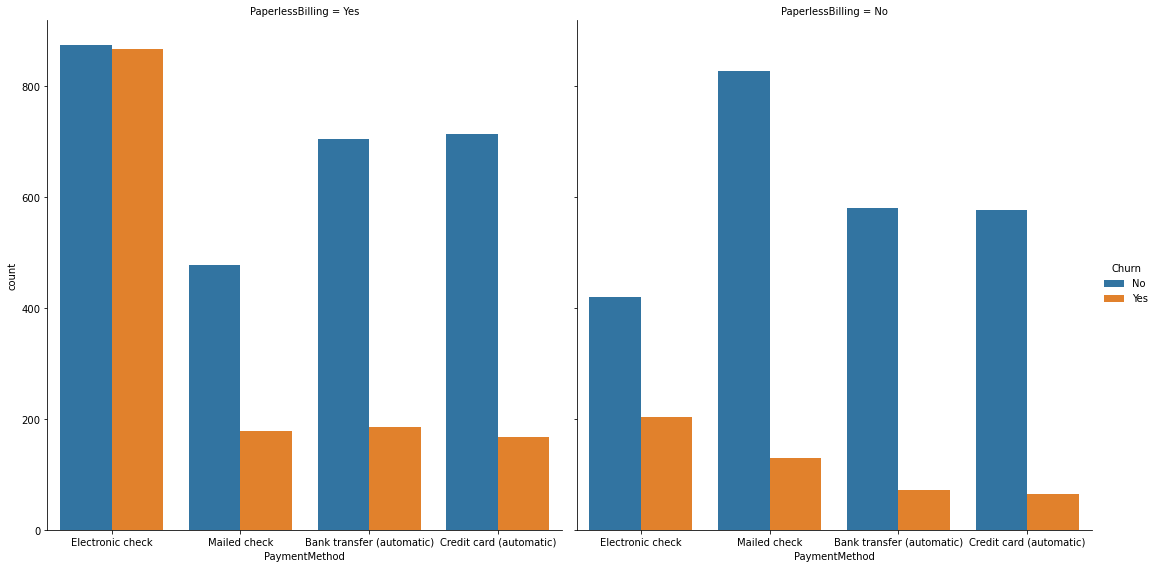

In [65]:
sns.catplot(x="PaymentMethod", hue="Churn", col="PaperlessBilling", data=df, kind="count", height=8, aspect=.95);


In [66]:
print(f'P(Уйдет в отток | Месячный контракт, безнал, электронный чек и оптоволокно) = {np.round(data[(data["Contract"] == "Month-to-month") & (data["PaperlessBilling"] == "Yes") & (data["InternetService"] == "Fiber optic") & (data["PaymentMethod"] == "Electronic check")]["Churn"].value_counts(normalize=True)["Yes"], 4) * 100}%')


P(Уйдет в отток | Месячный контракт, безнал, электронный чек и оптоволокно) = 62.92%


По сути, выше представлена вероятность оттока для некоторой "продвинутой" группы пользователей, которая пользуется множеством услуг и самыми современными способами оплаты

In [67]:
df

,InternetService,SeniorCitizen,usesWeb,PaperlessBilling,PaymentMethod,MonthlyCharges,Contract,Churn,Churn_encoded
0,DSL,0,1,Yes,Electronic check,29.85,Month-to-month,No,0
1,DSL,0,1,No,Mailed check,56.95,One year,No,0
2,DSL,0,1,Yes,Mailed check,53.85,Month-to-month,Yes,1
3,DSL,0,1,No,Bank transfer (automatic),42.30,One year,No,0
4,Fiber optic,0,1,Yes,Electronic check,70.70,Month-to-month,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,DSL,0,1,Yes,Mailed check,84.80,One year,No,0
7039,Fiber optic,0,1,Yes,Credit card (automatic),103.20,One year,No,0
7040,DSL,0,1,Yes,Electronic check,29.60,Month-to-month,No,0
7041,Fiber optic,1,1,Yes,Mailed check,74.40,Month-to-month,Yes,1
